In [1]:
import sys
sys.path.append('../scripts')
from utils import DataLoader
from data_preprocessing import PreprocessData
from feature_engineering import FeatureEngineering
from models import ModelTrainer
from feature_importance import FeatureInterpreter

In [2]:
data_loader = DataLoader()

In [3]:
data = data_loader.load_data("../data/processed/insurance_data.txt")

In [4]:
preprocess = PreprocessData(data)

In [5]:
preprocess.understand_data(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 50 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [6]:
preprocess.convert_data_types(data)

--- Updated Dtypes---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 50 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   UnderwrittenCoverID       1000098 non-null  int64         
 1   PolicyID                  1000098 non-null  int64         
 2   TransactionMonth          1000098 non-null  datetime64[ns]
 3   IsVATRegistered           1000098 non-null  bool          
 4   Citizenship               1000098 non-null  category      
 5   LegalType                 1000098 non-null  category      
 6   Title                     1000098 non-null  category      
 7   Language                  1000098 non-null  category      
 8   Bank                      854137 non-null   category      
 9   AccountType               959866 non-null   category      
 10  MaritalStatus             991839 non-null   category      
 11  Gender                    99

In [7]:
missing_summary = preprocess.check_missing_values(data)
display(missing_summary)

,MissingCount,MissingPercent
CustomValueEstimate,779642,77.96
NewVehicle,153295,15.33
Bank,145961,14.59
AccountType,40232,4.02
Gender,9536,0.95
MaritalStatus,8259,0.83
mmcode,552,0.06
VehicleType,552,0.06
make,552,0.06
Model,552,0.06


In [8]:
data_cleaned = preprocess.handle_missing_values(data)

In [9]:
missing_after = preprocess.check_missing_values(data_cleaned)
print(missing_after)

Empty DataFrame
Columns: [MissingCount, MissingPercent]
Index: []


### Feature Engineering

In [10]:
feature_eng = FeatureEngineering(data_cleaned)

In [11]:
data_features = feature_eng.create_features()
data_features.head()


,UnderwrittenCoverID,PolicyID,IsVATRegistered,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CapitalOutstanding,...,CoverGroup_Standalone passenger liability,CoverGroup_Third Party Only,CoverGroup_Trailer,Section_Motor Comprehensive,Section_Optional Extended Covers,Section_Standalone passenger liability,"Section_Third party or third party, fire and theft only",Product_Mobility Commercial Cover: Monthly,Product_Mobility Metered Taxis: Monthly,Product_Standalone Passenger Liability
0,145249,12827,True,44069150.0,2004,6.0,2597.0,130.0,4.0,119300.0,...,False,False,False,True,False,False,False,False,True,False
1,145249,12827,True,44069150.0,2004,6.0,2597.0,130.0,4.0,119300.0,...,False,False,False,True,False,False,False,False,True,False
2,145249,12827,True,44069150.0,2004,6.0,2597.0,130.0,4.0,119300.0,...,False,False,False,True,False,False,False,False,True,False
3,145255,12827,True,44069150.0,2004,6.0,2597.0,130.0,4.0,119300.0,...,False,False,False,True,False,False,False,False,True,False
4,145255,12827,True,44069150.0,2004,6.0,2597.0,130.0,4.0,119300.0,...,False,False,False,True,False,False,False,False,True,False


In [12]:
X_train_full, X_test_full, y_freq_train, y_freq_test, \
X_train_sev, y_sev_train, X_test_sev, y_sev_test = feature_eng.prepare_modeling_data()

# Quick overview
print("X_train_full:", X_train_full.shape)
print("X_test_full:", X_test_full.shape)
print("y_freq_train:", y_freq_train.shape)
print("y_freq_test:", y_freq_test.shape)

if X_train_sev is not None:
    print("X_train_sev:", X_train_sev.shape)
    print("X_test_sev:", X_test_sev.shape)
    print("y_sev_train:", y_sev_train.shape)
    print("y_sev_test:", y_sev_test.shape)



X_train_full: (800078, 1566)
X_test_full: (200020, 1566)
y_freq_train: (800078,)
y_freq_test: (200020,)
X_train_sev: (2230, 1566)
X_test_sev: (558, 1566)
y_sev_train: (2230,)
y_sev_test: (558,)


### Frequency Modeling (Classification)

In [20]:
# Initialize trainer for frequency
freq_trainer = ModelTrainer(X_train_full, X_test_full, y_freq_train, y_freq_test)

# Train models
lr_clf = freq_trainer.train_logistic_regression()
rf_clf = freq_trainer.train_rf_classifier()
xgb_clf = freq_trainer.train_xgb_classifier()

# Evaluate
_, lr_results = freq_trainer.evaluate_classification(lr_clf, name="Logistic Regression")
_, rf_results = freq_trainer.evaluate_classification(rf_clf, name="Random Forest")
_, xgb_results = freq_trainer.evaluate_classification(xgb_clf, name="XGBoost")


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [23:34:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Logistic Regression (Classification) ---
Accuracy: 0.9972
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
ROC-AUC: 0.5412

--- Random Forest (Classification) ---
Accuracy: 0.9972
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
ROC-AUC: 0.9040

--- XGBoost (Classification) ---
Accuracy: 0.9972
Precision: 1.0000
Recall: 0.0018
F1-Score: 0.0036
ROC-AUC: 0.9304


### Frequency Model Feature Importance


--- SHAP Feature Importance (Top 10) ---


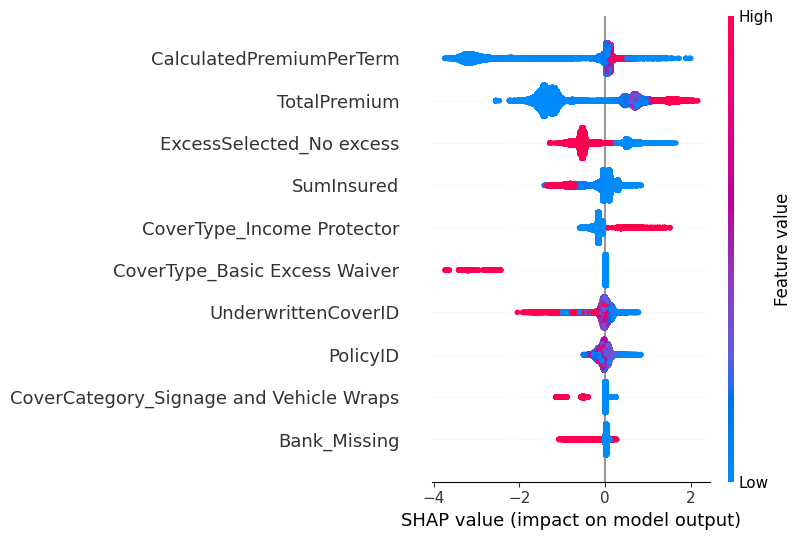

                                      Feature  Mean_Abs_SHAP
11                   CalculatedPremiumPerTerm       1.517479
12                               TotalPremium       1.190300
1497                 ExcessSelected_No excess       0.556015
10                                 SumInsured       0.242845
1535               CoverType_Income Protector       0.185122
1527            CoverType_Basic Excess Waiver       0.184586
0                         UnderwrittenCoverID       0.096188
1                                    PolicyID       0.092381
1516  CoverCategory_Signage and Vehicle Wraps       0.068343
39                               Bank_Missing       0.066660


In [21]:
# Example: using XGBoost classifier for frequency
freq_shap = FeatureInterpreter(xgb_clf, X_test_full)

# Generate SHAP summary
freq_feature_imp, freq_shap_values = freq_shap.shap_summary(top_n=10)

# Show top features
print(freq_feature_imp)

### Severity Modeling (Regression)

In [13]:
# Only if we have claims
if X_train_sev is not None:
    sev_trainer = ModelTrainer(X_train_sev, X_test_sev, y_sev_train, y_sev_test)

    # Train models
    lr_reg = sev_trainer.train_linear_regression()
    rf_reg = sev_trainer.train_random_forest()
    xgb_reg = sev_trainer.train_xgboost()

    # Evaluate
    _, _, _ = sev_trainer.evaluate_regression(lr_reg, name="Linear Regression")
    _, _, _ = sev_trainer.evaluate_regression(rf_reg, name="Random Forest")
    _, _, _ = sev_trainer.evaluate_regression(xgb_reg, name="XGBoost")


Linear Regression (Regression): RMSE=37704.19, R²=0.1580
Random Forest (Regression): RMSE=34934.59, R²=0.2772
XGBoost (Regression): RMSE=36222.26, R²=0.2229


### Severity Model Feature Importance


--- SHAP Feature Importance (Top 10) ---


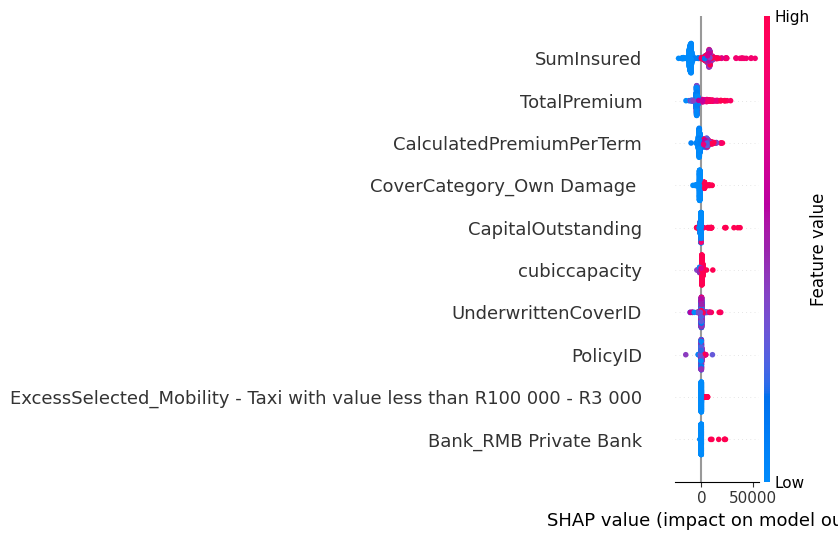

                                                Feature  Mean_Abs_SHAP
10                                           SumInsured    9756.543945
12                                         TotalPremium    4909.751465
11                             CalculatedPremiumPerTerm    3722.074463
1511                          CoverCategory_Own Damage     2215.369385
9                                    CapitalOutstanding    1025.298218
6                                         cubiccapacity     867.882629
0                                   UnderwrittenCoverID     685.067749
1                                              PolicyID     465.880798
1489  ExcessSelected_Mobility - Taxi with value less...     431.916748
37                                Bank_RMB Private Bank     408.687988


In [14]:
# Only if severity data exists
if X_train_sev is not None:
    sev_shap = FeatureInterpreter(xgb_reg, X_test_sev)

    # Generate SHAP summary
    sev_feature_imp, sev_shap_values = sev_shap.shap_summary(top_n=10)

    # Show top features
    print(sev_feature_imp)
